In [2]:
#sol1) 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier


In [4]:
# Load the datasets
train_url = 'https://raw.githubusercontent.com/FlipRoboTechnologies/ML-Datasets/main/Bank%20Marketing/termdeposit_train.csv'
test_url = 'https://raw.githubusercontent.com/FlipRoboTechnologies/ML-Datasets/main/Bank%20Marketing/termdeposit_test.csv'

train_data = pd.read_csv(train_url)
test_data = pd.read_csv(test_url)


In [5]:
# Display the first few rows of the training dataset
print(train_data.head())


      ID  age         job   marital  education default  balance housing loan  \
0  26110   56      admin.   married    unknown      no     1933      no   no   
1  40576   31     unknown   married  secondary      no        3      no   no   
2  15320   27    services   married  secondary      no      891     yes   no   
3  43962   57  management  divorced   tertiary      no     3287      no   no   
4  29842   31  technician   married  secondary      no      119     yes   no   

     contact  day month  duration  campaign  pdays  previous poutcome  \
0  telephone   19   nov        44         2     -1         0  unknown   
1   cellular   20   jul        91         2     -1         0  unknown   
2   cellular   18   jul       240         1     -1         0  unknown   
3   cellular   22   jun       867         1     84         3  success   
4   cellular    4   feb       380         1     -1         0  unknown   

  subscribed  
0         no  
1         no  
2         no  
3        yes  
4    

In [6]:
# Display summary statistics
print(train_data.describe())


                 ID           age        balance           day      duration  \
count  31647.000000  31647.000000   31647.000000  31647.000000  31647.000000   
mean   22563.972162     40.957247    1363.890258     15.835466    258.113534   
std    13075.936990     10.625134    3028.304293      8.337097    257.118973   
min        2.000000     18.000000   -8019.000000      1.000000      0.000000   
25%    11218.000000     33.000000      73.000000      8.000000    104.000000   
50%    22519.000000     39.000000     450.000000     16.000000    180.000000   
75%    33879.500000     48.000000    1431.000000     21.000000    318.500000   
max    45211.000000     95.000000  102127.000000     31.000000   4918.000000   

           campaign         pdays      previous  
count  31647.000000  31647.000000  31647.000000  
mean       2.765697     39.576042      0.574272  
std        3.113830     99.317592      2.422529  
min        1.000000     -1.000000      0.000000  
25%        1.000000     -1.00

In [7]:
# Check for missing values
print(train_data.isnull().sum())


ID            0
age           0
job           0
marital       0
education     0
default       0
balance       0
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
subscribed    0
dtype: int64


In [8]:
# Display the column names to identify the correct columns
print(train_data.columns)


Index(['ID', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome', 'subscribed'],
      dtype='object')


In [9]:
# Encode categorical variables
categorical_vars = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'subscribed']

for var in categorical_vars:
    le = LabelEncoder()
    train_data[var] = le.fit_transform(train_data[var])
    if var in test_data.columns:
        test_data[var] = le.transform(test_data[var])


In [10]:
# Split the training data into training and validation sets
X = train_data.drop(['ID', 'subscribed'], axis=1)
y = train_data['subscribed']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


In [11]:
# Scale numerical variables
scaler = StandardScaler()
numerical_vars = ['age', 'balance', 'duration', 'campaign', 'pdays', 'previous']

X_train[numerical_vars] = scaler.fit_transform(X_train[numerical_vars])
X_val[numerical_vars] = scaler.transform(X_val[numerical_vars])
test_data[numerical_vars] = scaler.transform(test_data[numerical_vars])


In [12]:
# Function to evaluate models
def evaluate_model(model, X_val, y_val):
    y_pred = model.predict(X_val)
    print(f"Accuracy: {accuracy_score(y_val, y_pred)}")
    print(classification_report(y_val, y_pred))
    cm = confusion_matrix(y_val, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()


Training Logistic Regression...
Evaluating Logistic Regression...
Accuracy: 0.8900473933649289
              precision    recall  f1-score   support

           0       0.91      0.98      0.94      5599
           1       0.56      0.24      0.33       731

    accuracy                           0.89      6330
   macro avg       0.73      0.61      0.64      6330
weighted avg       0.87      0.89      0.87      6330



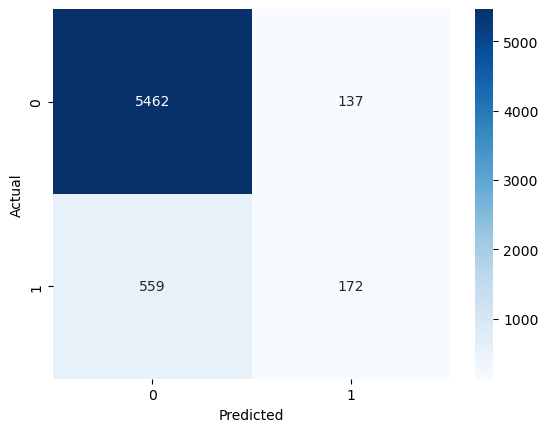

Training Decision Tree...
Evaluating Decision Tree...
Accuracy: 0.8682464454976303
              precision    recall  f1-score   support

           0       0.93      0.92      0.93      5599
           1       0.44      0.47      0.45       731

    accuracy                           0.87      6330
   macro avg       0.68      0.70      0.69      6330
weighted avg       0.87      0.87      0.87      6330



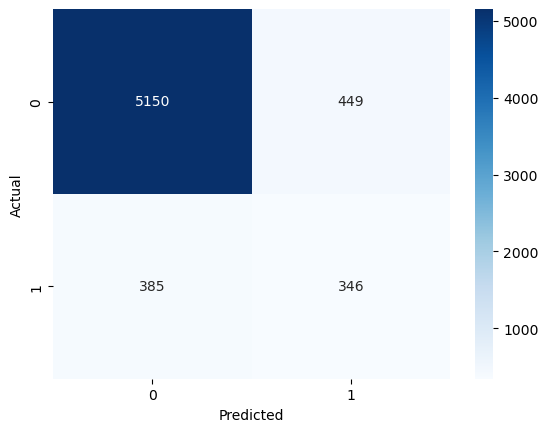

Training Random Forest...
Evaluating Random Forest...
Accuracy: 0.9048973143759874
              precision    recall  f1-score   support

           0       0.93      0.97      0.95      5599
           1       0.63      0.43      0.51       731

    accuracy                           0.90      6330
   macro avg       0.78      0.70      0.73      6330
weighted avg       0.89      0.90      0.90      6330



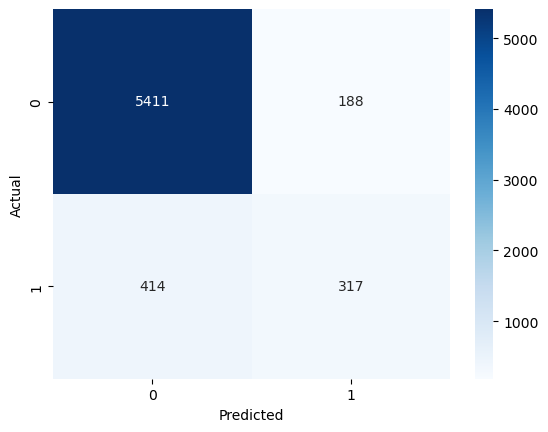

Training Gradient Boosting...
Evaluating Gradient Boosting...
Accuracy: 0.9001579778830964
              precision    recall  f1-score   support

           0       0.92      0.97      0.94      5599
           1       0.61      0.38      0.47       731

    accuracy                           0.90      6330
   macro avg       0.77      0.68      0.71      6330
weighted avg       0.89      0.90      0.89      6330



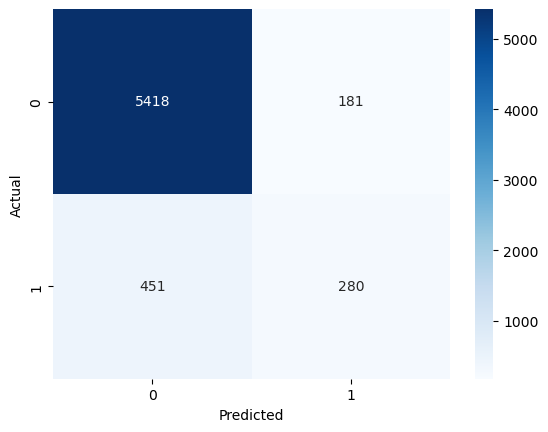

In [13]:
# Train and evaluate different models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier()
}

for model_name, model in models.items():
    print(f"Training {model_name}...")
    model.fit(X_train, y_train)
    print(f"Evaluating {model_name}...")
    evaluate_model(model, X_val, y_val)


In [14]:
# Select the best model (example: RandomForest)
best_model = RandomForestClassifier()
best_model.fit(X_train, y_train)


RandomForestClassifier()

In [15]:
# Make predictions on the test data
test_predictions = best_model.predict(test_data.drop(['ID'], axis=1))


In [16]:
# Save the predictions to a CSV file
submission = pd.DataFrame({'ID': test_data['ID'], 'Subscribed': test_predictions})
submission.to_csv('term_deposit_predictions.csv', index=False)
print("Predictions saved to term_deposit_predictions.csv")

Predictions saved to term_deposit_predictions.csv


In [18]:
#sol2) 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor


In [19]:
# Load the datasets
train_url = 'https://github.com/FlipRoboTechnologies/ML-Datasets/blob/main/Restaurant%20Food%20Cost/Data_Train.xlsx?raw=true'
test_url = 'https://github.com/FlipRoboTechnologies/ML-Datasets/blob/main/Restaurant%20Food%20Cost/Data_Test.xlsx?raw=true'

train_data = pd.read_excel(train_url)
test_data = pd.read_excel(test_url)


In [20]:
# Display the first few rows of the training dataset
print(train_data.head())


               TITLE  RESTAURANT_ID  \
0      CASUAL DINING           9438   
1  CASUAL DINING,BAR          13198   
2      CASUAL DINING          10915   
3        QUICK BITES           6346   
4     DESSERT PARLOR          15387   

                                     CUISINES  \
0                 Malwani, Goan, North Indian   
1              Asian, Modern Indian, Japanese   
2  North Indian, Chinese, Biryani, Hyderabadi   
3                            Tibetan, Chinese   
4                                    Desserts   

                                     TIME     CITY        LOCALITY RATING  \
0  11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)    Thane  Dombivali East    3.6   
1                    6pm – 11pm (Mon-Sun)  Chennai       Ramapuram    4.2   
2     11am – 3:30pm, 7pm – 11pm (Mon-Sun)  Chennai      Saligramam    3.8   
3                 11:30am – 1am (Mon-Sun)   Mumbai     Bandra West    4.1   
4                    11am – 1am (Mon-Sun)   Mumbai     Lower Parel    3.8   

       

In [21]:
# Display summary statistics
print(train_data.describe())


       RESTAURANT_ID          COST
count   12690.000000  12690.000000
mean     7759.134121    655.252246
std      4504.874150    627.003540
min         0.000000     20.000000
25%      3863.250000    300.000000
50%      7740.000000    500.000000
75%     11688.750000    800.000000
max     15573.000000  14000.000000


In [22]:
# Check for missing values
print(train_data.isnull().sum())


TITLE               0
RESTAURANT_ID       0
CUISINES            0
TIME                0
CITY              112
LOCALITY           98
RATING              2
VOTES            1204
COST                0
dtype: int64


In [23]:
# Fill missing values
train_data.fillna({
    'TITLE': 'Unknown',
    'CITY': 'Unknown',
    'LOCALITY': 'Unknown',
    'RATING': train_data['RATING'].mode()[0],
    'VOTES': train_data['VOTES'].mode()[0]
}, inplace=True)

test_data.fillna({
    'TITLE': 'Unknown',
    'CITY': 'Unknown',
    'LOCALITY': 'Unknown',
    'RATING': test_data['RATING'].mode()[0],
    'VOTES': test_data['VOTES'].mode()[0]
}, inplace=True)


In [24]:
# Convert RATING and VOTES columns to numeric, replacing non-numeric values
train_data['RATING'] = pd.to_numeric(train_data['RATING'], errors='coerce')
train_data['VOTES'] = pd.to_numeric(train_data['VOTES'].str.replace(' votes', ''), errors='coerce')
test_data['RATING'] = pd.to_numeric(test_data['RATING'], errors='coerce')
test_data['VOTES'] = pd.to_numeric(test_data['VOTES'].str.replace(' votes', ''), errors='coerce')


In [25]:
# Fill any remaining missing values with median
train_data['RATING'].fillna(train_data['RATING'].median(), inplace=True)
train_data['VOTES'].fillna(train_data['VOTES'].median(), inplace=True)
test_data['RATING'].fillna(test_data['RATING'].median(), inplace=True)
test_data['VOTES'].fillna(test_data['VOTES'].median(), inplace=True)


In [26]:
# Encode categorical variables
categorical_vars = ['TITLE', 'CUISINES', 'TIME', 'CITY', 'LOCALITY']


In [28]:
# Combine train and test data for consistent encoding
combined_data = pd.concat([train_data[categorical_vars], test_data[categorical_vars]], axis=0)

for var in categorical_vars:
    le = LabelEncoder()
    combined_data[var] = le.fit_transform(combined_data[var])
    train_data[var] = le.transform(train_data[var])
    test_data[var] = le.transform(test_data[var])


In [29]:
# Split the training data into training and validation sets
X = train_data.drop(['RESTAURANT_ID', 'COST'], axis=1)
y = train_data['COST']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


In [30]:
# Scale numerical variables
scaler = StandardScaler()
numerical_vars = ['RATING', 'VOTES']

X_train[numerical_vars] = scaler.fit_transform(X_train[numerical_vars])
X_val[numerical_vars] = scaler.transform(X_val[numerical_vars])
test_data[numerical_vars] = scaler.transform(test_data[numerical_vars])


In [31]:
# Function to evaluate models
def evaluate_model(model, X_val, y_val):
    y_pred = model.predict(X_val)
    print(f"Mean Squared Error: {mean_squared_error(y_val, y_pred)}")
    print(f"R-squared: {r2_score(y_val, y_pred)}")
    plt.scatter(y_val, y_pred)
    plt.xlabel('Actual Cost')
    plt.ylabel('Predicted Cost')
    plt.title('Actual vs Predicted Cost')
    plt.show()


Training Linear Regression...
Evaluating Linear Regression...
Mean Squared Error: 296992.0924757126
R-squared: 0.17479244846441422


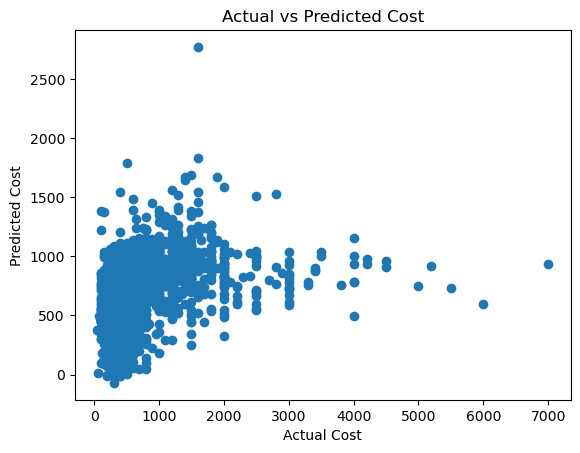

Training Decision Tree...
Evaluating Decision Tree...
Mean Squared Error: 167567.08865248226
R-squared: 0.534406368222853


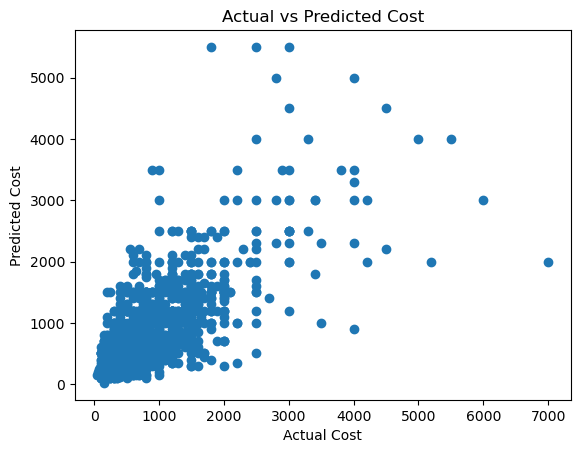

Training Random Forest...
Evaluating Random Forest...
Mean Squared Error: 95556.68094051091
R-squared: 0.7344909285144192


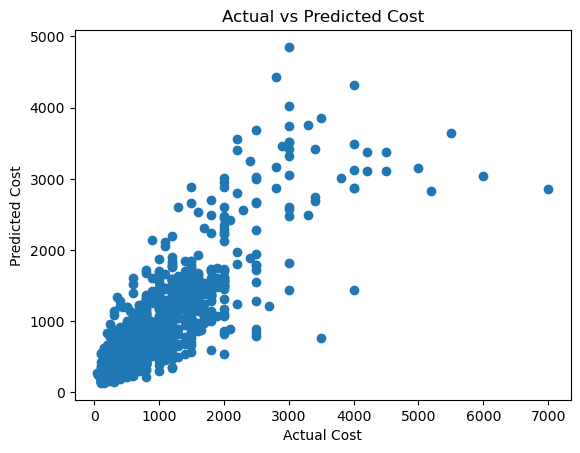

Training Gradient Boosting...
Evaluating Gradient Boosting...
Mean Squared Error: 100076.18203392712
R-squared: 0.7219332661188611


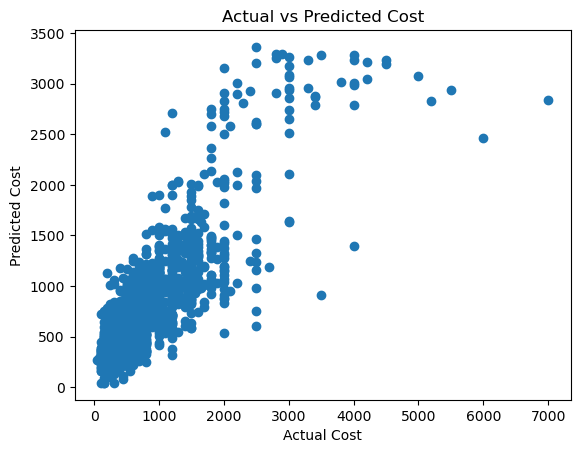

In [32]:
# Train and evaluate different models
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor()
}

for model_name, model in models.items():
    print(f"Training {model_name}...")
    model.fit(X_train, y_train)
    print(f"Evaluating {model_name}...")
    evaluate_model(model, X_val, y_val)


In [33]:
# Select the best model (example: RandomForest)
best_model = RandomForestRegressor()
best_model.fit(X_train, y_train)


RandomForestRegressor()

In [34]:
# Make predictions on the test data
test_predictions = best_model.predict(test_data.drop(['RESTAURANT_ID'], axis=1))


In [35]:
# Save the predictions to a CSV file
submission = pd.DataFrame({'RESTAURANT_ID': test_data['RESTAURANT_ID'], 'COST': test_predictions})
submission.to_csv('restaurant_food_cost_predictions.csv', index=False)
print("Predictions saved to restaurant_food_cost_predictions.csv")


Predictions saved to restaurant_food_cost_predictions.csv
